# FLORIAN DARGEL

## Nearest neighbor

On va prendre pour exemple le graphe ci-dessous

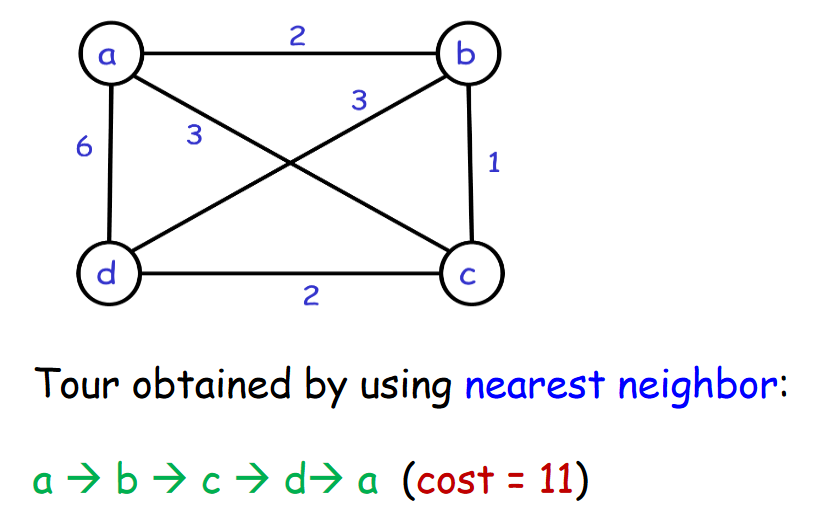

In [1]:
from PIL import Image
im = Image.open('C:/Users/na_to/OneDrive/Bureau/Insa/Mapromo/Graph_optimisation/nearest.PNG')
im

On construit notre matrice avec les distances associées pour chaque point

In [2]:
inf = np.inf
A = np.array([[inf,2,3,6],[2,inf,1,3],[3,1,inf,2],[6,3,2,inf]])

In [3]:
print(A)

[[inf  2.  3.  6.]
 [ 2. inf  1.  3.]
 [ 3.  1. inf  2.]
 [ 6.  3.  2. inf]]


In [10]:
def voisin(Matrice,point_de_depart):
    
    #Ininitalisation
    sommet_visited = [] #les sommets déjà visités
    poids =[] #Pour sommet les poids des arcs
    placement_min = point_de_depart #le placement où se trouve le minimum dans la matrice 
    sommet_visited.append(placement_min) #On ajouter déjà le sommet du point de départ 

    #Le code 
    
    while len(sommet_visited) < len(Matrice):
        mini = int(min(set(Matrice[placement_min])-set(Matrice[placement_min,sommet_visited])))
        placement_min = int(np.where(Matrice[placement_min]== mini)[0])
        sommet_visited.append(placement_min)
        poids.append(mini)
        
    #Pour prendre le poids du dernier arc du graphe    
    sommet_visited_bis = sommet_visited[1:] 
    mini = int(min(set(Matrice[placement_min])-set(Matrice[placement_min,sommet_visited_bis]))) 
    poids.append(mini)       
    cout = sum(poids)    
    
    #Pour ajouter le point de depart dans sommet_visited pour dire qu'on a fait un cycle  
    if len(sommet_visited) == len(Matrice):
        k = sommet_visited[0]
        sommet_visited.append(k)
        
    
    return "sommets visités " + str(sommet_visited) + " de longueur " + str(cout)

On test avec différent points de départ

    0 : le point A
    1 : le point B
    2 : le point C 
    3 : le point D 

In [11]:
voisin(A,0)

'sommets visités [0, 1, 2, 3, 0] de longueur 11'

In [12]:
voisin(A,1)

'sommets visités [1, 2, 3, 0, 1] de longueur 11'

In [13]:
voisin(A,2)

'sommets visités [2, 1, 0, 3, 2] de longueur 11'

In [14]:
voisin(A,3)

'sommets visités [3, 2, 1, 0, 3] de longueur 11'

Remarque : mon algorithme pose problème lorsqu'on a un sommet qui est relié à 2 arcs de même longeur. Prenons pour exemple la matrice ci-dessous en prenant cette fois la longeur de l'arc "ab" = "ac" = "ad" = 2

In [15]:
B = np.array([[inf,2,2,2],[2,inf,1,3],[3,1,inf,2],[6,3,2,inf]])
voisin(B,1)

ValueError: min() arg is an empty sequence

Le problème vient du choix du minimum dans la matrice de B. Il est possible d'amèliorer l'algorithme pour traiter ce cas.